<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/Ashish_Kashav_Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve  ,roc_auc_score

In [2]:
!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv

--2020-04-28 23:12:30--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.03s   

2020-04-28 23:12:30 (2.17 MB/s) - ‘titanic.csv’ saved [61194/61194]



In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
import numpy as np

In [0]:
titanic_data['Age'].fillna(np.mean(titanic_data['Age']),inplace=True)

In [18]:
print(titanic_data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
titanic_data.drop(['Ticket','Cabin','Name','PassengerId'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fd8428a90>,
      dtype=object)

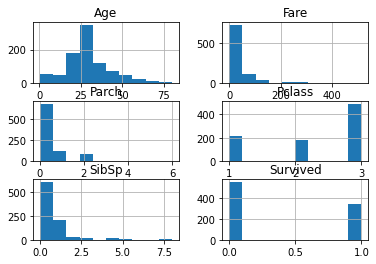

In [13]:
titanic_data.hist()

In [0]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [0]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [22]:
X.nunique()

Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [0]:
OHX=pd.get_dummies(X,columns=['Embarked','Sex'],drop_first=True)

In [21]:
OHX

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22.000000,1,0,7.2500,0,1,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,1,0
3,1,35.000000,1,0,53.1000,0,1,0
4,3,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,1
887,1,19.000000,0,0,30.0000,0,1,0
888,3,29.699118,1,2,23.4500,0,1,0
889,1,26.000000,0,0,30.0000,0,0,1


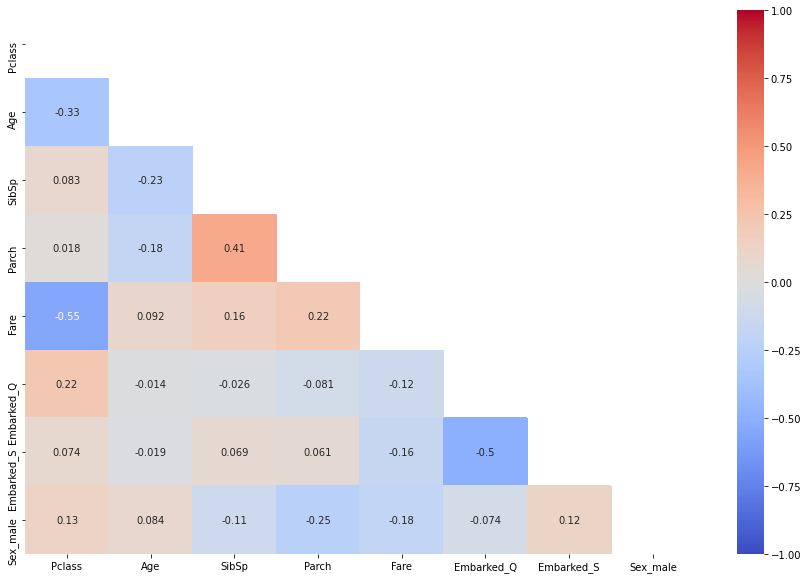

In [26]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(OHX.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(OHX.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [0]:
from sklearn.metrics import plot_confusion_matrix

In [0]:
Xtrain,Xtest,ytrain,ytest=train_test_split(OHX,y,test_size=0.25)

In [0]:
def plotMetrics(models,Xtrain,ytrain,Xtest,ytest):
  for model in models:
    modelName=str(model)
    start = modelName.find( '(' )
    if start != -1:
      modelName = modelName[:start] 
    print('Model: ',str(modelName)+'\n')
    model.fit(Xtrain,ytrain)
    predictions = model.predict(Xtest)
    probs = model.predict_proba(Xtest)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(ytest, probs) 
    plt.plot(fper, tper)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    auc = roc_auc_score(ytest, probs)
    plt.title('ROC curve')
    plt.show()
    print('AUC: '+str(auc)+'\n')
    print('Accuracy: ',accuracy_score(ytest, predictions),'\n')
    print(classification_report(ytest, predictions))
    print('\n')


In [0]:
rf=RandomForestClassifier(max_depth=5,class_weight='balanced')
gbc=GradientBoostingClassifier(max_depth=5)
xgb=XGBClassifier(max_depth=5,class_weight='balanced')
models=[rf,xgb,gbc]

Model:  RandomForestClassifier



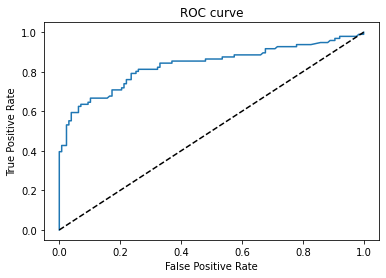

AUC: 0.8332923228346456

Accuracy:  0.7713004484304933 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       127
           1       0.75      0.71      0.73        96

    accuracy                           0.77       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.77      0.77      0.77       223



Model:  XGBClassifier



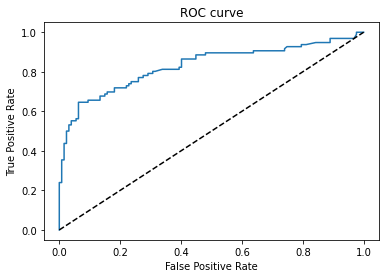

AUC: 0.8297244094488189

Accuracy:  0.7892376681614349 

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       127
           1       0.82      0.66      0.73        96

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.79      0.79      0.78       223



Model:  GradientBoostingClassifier



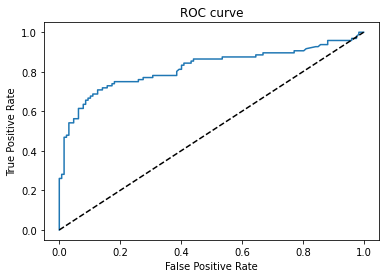

AUC: 0.8194717847769029

Accuracy:  0.7937219730941704 

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.80      0.69      0.74        96

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223





In [146]:
plotMetrics(models,Xtrain,ytrain,Xtest,ytest)

In [0]:
def ensemble(models,xtest,ytest,threshold):
    pred=0
    wts=0
    for model,weight in models:
      pred=model.predict_proba(xtest)*weight+pred
      wts=weight+wts
    pred=pred/wts
    auc = roc_auc_score(ytest, pred[:,1]) 
    fper, tper, thresholds = roc_curve(ytest, pred[:,1]) 
    plt.plot(fper, tper)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
    print('AUC: '+str(auc)+'\n')
    pred=np.round(pred - threshold + 0.5)
    print('Accuracy: ',accuracy_score(ytest, pred[:,1]),'\n')
    print('Classification Report: ',classification_report(ytest, pred[:,1]),'\n')
    sns.heatmap(confusion_matrix(ytest, pred[:,1]),annot=True,fmt='3.0f',cmap="summer")

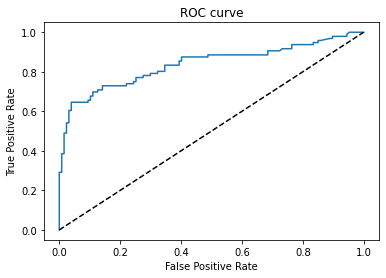

AUC: 0.8376804461942258

Accuracy:  0.820627802690583 

Classification Report:                precision    recall  f1-score   support

           0       0.78      0.95      0.86       127
           1       0.91      0.65      0.76        96

    accuracy                           0.82       223
   macro avg       0.85      0.80      0.81       223
weighted avg       0.84      0.82      0.81       223
 



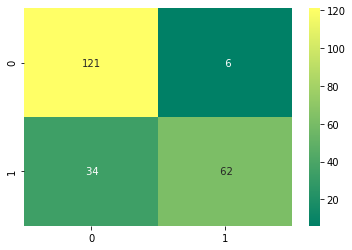

In [142]:
modelsWithWeights=[(rf,30),(xgb,40),(gbc,30)]
ensemble(modelsWithWeights,Xtest,ytest,0.7)

We can see here our custom ensemble performs better than all the indivisual models.